### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 7


### Дисциплина: Методы машинного обучения

##### Студент:  Петров Артем Евгеньевич
##### Группа:   НКНбд-01-21

## Москва 2024
***

# Задание:

1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки. Оставьте в обучающей и тестовой выборках диапазон классов, указанных в индивидуальном задании. Если изображения цветные (с тремя каналами), то перекодируйте их в одноцветные (оттенки серого).
2. Постройте для набора данных график логарифмического правдоподобия профиля в зависимости от числа главных компонент и определите размерность латентного пространства.
3. Создайте и обучите на обучающей выборке автокодировщик архитектуры, указанной в индивидуальном задании, с размерностью скрытого представления, равной размерности латентного пространства, определенной в п.2. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей.
Визуализируйте несколько исходных и восстановленных автокодировщиком изображений.  
4. Оцените качество модели автокодировщика на тестовой выборке по показателю, указанному в индивидуальном задании.
5. Оставьте в наборах изображения первых двух классов диапазона, указанного в индивидуальном задании первыми. Визуализируйте набор данных на плоскости, соответствующей двум первым латентным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.
6. Выполните бинарную классификацию изображений по латентным (скрытым) признакам и всем признакам при помощи классификатора метода ближайших соседей (kNN). Оцените бинарный классификатор, указанный в индивидуальном задании, для двух построенных классификаторов.
7. Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) (Указание: используйте метод predict_proba() класса KNeighborsClassifier).
8. Визуализируйте границы принятия решений классификатора kNN для латентных признаков на плоскости, соответствующей двум первым латентным признакам (для прочих латентных признаков задайте средние/медианные значения).  
9. Определите на первоначальной тестовой выборке изображение, имеющее наибольшую ошибку реконструкции. Выведите для этого изображения первоначальное и реконструированное изображения.
***

## Вариант 3

1. Набор данных: svhn_cropped

2. Диапазон классов: 0, 1, 2, 3, 4

3. Архитектура автокодировщика: MLP

4. Показатель качества: cреднее квадратичное логарифмическое отклонение (MSLE) для ошибки реконструкции

5. Показатель качества бинарной классификации:

F1-мера, равная 2*TP/(2*TP+FP+FN)
***

# 1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки. Оставьте в обучающей и тестовой выборках диапазон классов, указанных в индивидуальном задании. Если изображения цветные (с тремя каналами), то перекодируйте их в одноцветные (оттенки серого).

1. Набор данных: svhn_cropped

2. Диапазон классов: 0, 1, 2, 3, 4

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds_train = tfds.load('svhn_cropped', split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteHVO806/svhn_cropped-train.tfrecord*...:   0%|…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteHVO806/svhn_cropped-test.tfrecord*...:   0%| …

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteHVO806/svhn_cropped-extra.tfrecord*...:   0%|…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.0.0. Subsequent calls will reuse this data.


In [3]:
ds_test = tfds.load('svhn_cropped', split = 'test')

In [4]:
df_train = tfds.as_dataframe(ds_train)

In [5]:
df_test = tfds.as_dataframe(ds_test)

In [6]:
df_train['label'].value_counts()

label
1    13861
2    10585
3     8497
4     7458
5     6882
6     5727
7     5595
8     5045
0     4948
9     4659
Name: count, dtype: int64

In [7]:
df_train = df_train[df_train['label'] < 5]

In [8]:
df_train['label'].value_counts()

label
1    13861
2    10585
3     8497
4     7458
0     4948
Name: count, dtype: int64

In [9]:
df_test = df_test[df_test['label'] < 5]

In [10]:
df_test['label'].value_counts()

label
1    5099
2    4149
3    2882
4    2523
0    1744
Name: count, dtype: int64

In [11]:
from PIL import Image, ImageOps

In [12]:
df_train['image'] = df_train['image'].apply(lambda x: np.array(ImageOps.grayscale((Image.fromarray(x)))) )

<ipython-input-12-25ab07e78023>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['image'] = df_train['image'].apply(lambda x: np.array(ImageOps.grayscale((Image.fromarray(x)))) )


array([[134, 135, 136, ...,  19,  20,  20],
       [135, 135, 136, ...,  20,  20,  20],
       [136, 135, 135, ...,  20,  21,  20],
       ...,
       [ 90,  76,  69, ...,  95,  69,  44],
       [ 80,  70,  67, ...,  99,  74,  48],
       [ 72,  66,  66, ..., 104,  79,  52]], dtype=uint8)
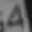

In [13]:
df_train['image'][0]

In [14]:
df_test['image'] = df_test['image'].apply(lambda x: np.array(ImageOps.grayscale((Image.fromarray(x)))) )

<ipython-input-14-39d25263a5ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['image'] = df_test['image'].apply(lambda x: np.array(ImageOps.grayscale((Image.fromarray(x)))) )


array([[137, 138, 138, ..., 137, 140, 140],
       [137, 137, 138, ..., 137, 140, 141],
       [137, 137, 137, ..., 139, 141, 140],
       ...,
       [135, 135, 135, ..., 142, 143, 144],
       [135, 135, 135, ..., 140, 141, 143],
       [135, 135, 135, ..., 137, 137, 140]], dtype=uint8)
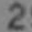

In [15]:
df_test['image'][2]

***
# 2. Постройте для набора данных график логарифмического правдоподобия профиля в зависимости от числа главных компонент и определите размерность латентного пространства.

In [16]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
import warnings
warnings.simplefilter("ignore", RuntimeWarning)

In [17]:
def log_likelyhood(evals):
  Lmax = len(evals)
  l1 = np.arange(0.0, Lmax)

  for L in range(Lmax):
    group1 = evals[0: L+1]
    group2 = evals[L+1: Lmax]

    mu1 = np.mean(group1)
    mu2 = np.mean(group2)

    sigma = (np.sum((group1 - mu1) ** 2) + np.sum((group2 - mu2) ** 2 ))/ Lmax

    l1_group1 = np.sum(np.sum(multivariate_normal.logpdf(group1, mu1, sigma)))

    l1_group2 = np.sum(np.sum(multivariate_normal.logpdf(group2, mu2, sigma)))

    l1[L] = l1_group1 + l1_group2

  return l1

In [18]:
df_test['image'].values.shape[0], df_test['image'].values[0].shape[1],

(16397, 32)

In [19]:
def unstack(vals: np.ndarray):
  X = np.empty(shape = (vals.shape[0], vals[0].shape[0], vals[0].shape[1]))
  for i in range(X.shape[0]):
    X[i] = vals[i]

  return X

In [20]:
X_train = unstack(df_train['image'].values)
X_test = unstack(df_test['image'].values)

In [21]:
X_train.shape, X_test.shape

((45349, 32, 32), (16397, 32, 32))

In [22]:
x_pca = np.reshape(X_train, (X_train.shape[0], (X_train.shape[1] * X_train.shape[2])))

In [23]:
n_samples, n_features = x_pca.shape
Kmax = min(n_samples, n_features)


pca = PCA(n_components = Kmax)
X_transformed = pca.fit_transform(x_pca)

In [24]:
evals = pca.explained_variance_
ll = log_likelyhood(evals)

fraction_var = np.cumsum(evals[:50] / np.sum(evals))

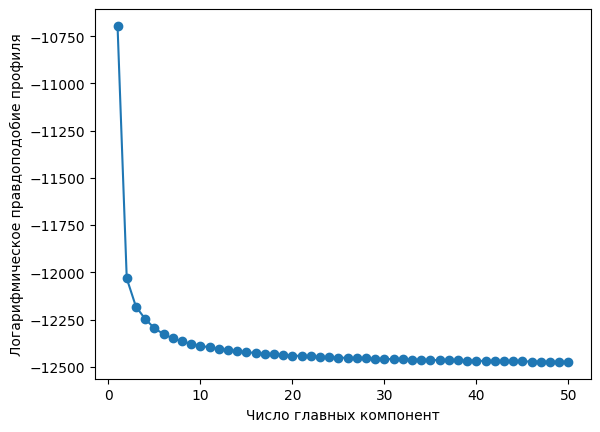

In [25]:
fig, ax = plt.subplots()
xs = np.arange(1, 51)
ys = ll[:50]

plt.xlabel("Число главных компонент")
plt.ylabel("Логарифмическое правдоподобие профиля")

ax.plot(xs, ys, marker = "o")
plt.show()

***
# 3. Создайте и обучите на обучающей выборке автокодировщик архитектуры, указанной в индивидуальном задании, с размерностью скрытого представления, равной размерности латентного пространства, определенной в п.2. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей.Визуализируйте несколько исходных и восстановленных автокодировщиком изображений.

3. Архитектура автокодировщика: MLP

4. Показатель качества: cреднее квадратичное логарифмическое отклонение (MSLE) для ошибки реконструкции

In [26]:
X_train_MLP = np.reshape(X_train, (X_train.shape[0], (X_train.shape[1] * X_train.shape[2])))

In [27]:
X_test_MLP = np.reshape(X_test, (X_test.shape[0], (X_test.shape[1] * X_test.shape[2])))

In [28]:
X_train_MLP.shape, X_test_MLP.shape

((45349, 1024), (16397, 1024))

In [29]:
X_train_MLP = X_train_MLP / 255
X_test_MLP = X_test_MLP / 255

In [30]:
X_train_MLP[0]

array([0.5254902 , 0.52941176, 0.53333333, ..., 0.40784314, 0.30980392,
       0.20392157])

In [31]:
X_test_MLP[0]

array([0.7372549 , 0.74509804, 0.76470588, ..., 0.81176471, 0.80784314,
       0.80784314])

In [32]:
def create_autoencoders_simple( feature_layer_dim = 16):
  input_img = tf.keras.layers.Input(shape = (1024), name = 'Input_Layer')

  encoded = tf.keras.layers.Dense(feature_layer_dim, activation = 'relu', name = 'Encoded_Features')(input_img)
  decoded = tf.keras.layers.Dense(1024, activation = 'sigmoid', name = 'Decoded_Input')(encoded)

  autoencoder = tf.keras.Model(input_img, decoded)
  encoder = tf.keras.Model(input_img, encoded)

  encoded_input = tf.keras.layers.Input(shape = (feature_layer_dim, ))
  decoder = autoencoder.layers[-1]
  decoder = tf.keras.Model(encoded_input, decoder(encoded_input))

  return autoencoder, encoder, decoder

In [33]:
autoencoder16_simple, encoder16_simple, decoder16_simple = create_autoencoders_simple(16)

In [34]:
autoencoder16_simple.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                      loss = tf.keras.losses.MeanSquaredError(),
                      metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                      )

In [35]:
autoencoder16_simple_hist = autoencoder16_simple.fit(
    X_train_MLP,
    X_train_MLP,
    epochs = 30,
    batch_size = 128,
    shuffle = True,
    validation_data = (X_test_MLP, X_test_MLP),
    verbose = 1
)

Epoch 1/30
355/355 [==============================] - 4s 9ms/step - loss: 0.0405 - mean_squared_logarithmic_error: 0.0196 - val_loss: 0.0455 - val_mean_squared_logarithmic_error: 0.0219
Epoch 2/30
355/355 [==============================] - 3s 8ms/step - loss: 0.0351 - mean_squared_logarithmic_error: 0.0169 - val_loss: 0.0362 - val_mean_squared_logarithmic_error: 0.0176
Epoch 3/30
355/355 [==============================] - 3s 7ms/step - loss: 0.0312 - mean_squared_logarithmic_error: 0.0151 - val_loss: 0.0330 - val_mean_squared_logarithmic_error: 0.0160
Epoch 4/30
355/355 [==============================] - 4s 12ms/step - loss: 0.0291 - mean_squared_logarithmic_error: 0.0141 - val_loss: 0.0310 - val_mean_squared_logarithmic_error: 0.0150
Epoch 5/30
355/355 [==============================] - 3s 7ms/step - loss: 0.0274 - mean_squared_logarithmic_error: 0.0133 - val_loss: 0.0291 - val_mean_squared_logarithmic_error: 0.0140
Epoch 6/30
355/355 [==============================] - 3s 8ms/step - l

In [36]:
encoded_imgs_simple = encoder16_simple.predict(X_test_MLP)
decoded_imgs_simple = decoder16_simple.predict(encoded_imgs_simple)

513/513 [==============================] - 1s 2ms/step


In [37]:
def image_show(orig, dec, fname = None):
  n = 10
  fig = plt.figure(figsize = (20, 4))

  for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(orig[i].reshape(32, 32))
    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)

    plt.imshow(dec[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  plt.tight_layout()
  plt.show()

  if fname:
    fig.savefig(fname)

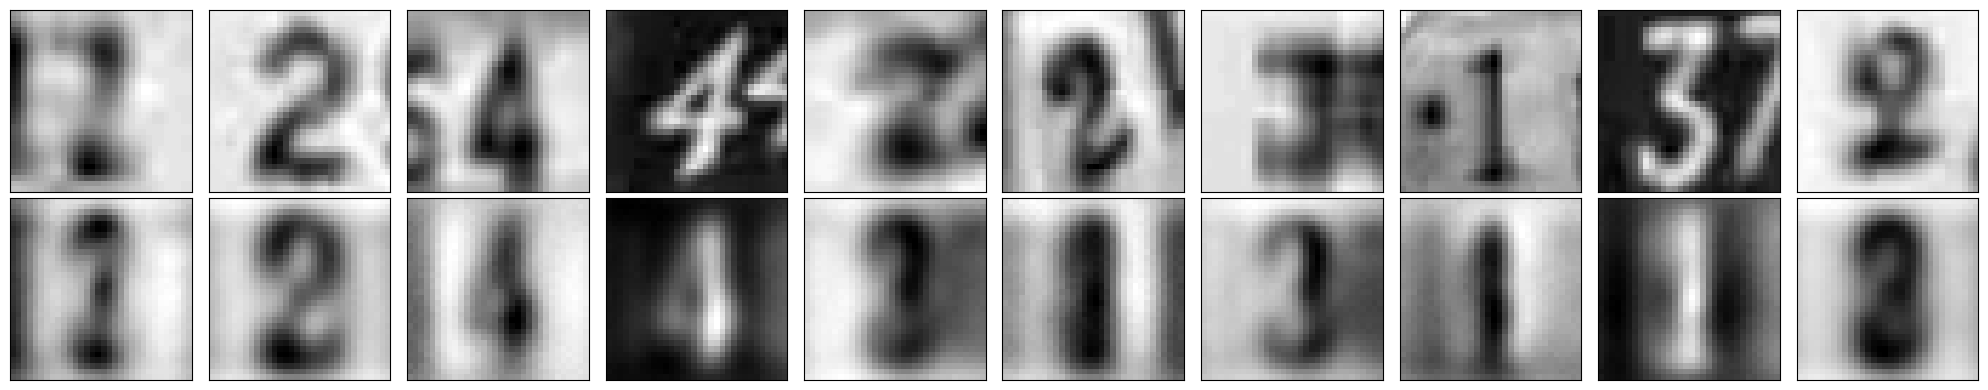

In [38]:
image_show(X_test_MLP, decoded_imgs_simple)

## Как мы видим, несмотря на то, что нейросеть обучилась, она плохо декодирует изображения(см картинки 3, 4, 5, 6, 9)

In [39]:
# def create_autoencoders (feature_layer_dim = 16):
#     input_img = Input(shape = (784,), name = 'Input_Layer')
#     # Слой encoded имеет размерность, равную feature_layer_dim
#     # и содержит закодированные входные данные
#     encoded = Dense(feature_layer_dim, activation = 'relu',
#                     name = 'Encoded_Features')(input_img)
#     decoded = Dense(784, activation = 'sigmoid',
#                     name = 'Decoded_Input')(encoded)

#     autoencoder = Model(input_img, decoded)
#     encoder = Model(input_img, encoded)

#     encoded_input = Input(shape = (feature_layer_dim,))
#     decoder = autoencoder.layers[-1]
#     decoder = Model(encoded_input, decoder(encoded_input))

#     return autoencoder, encoder, decoder

In [40]:
def create_autoencoders( feature_layer_dim = 16, resolution = 1024):
  input_img = tf.keras.layers.Input(shape = (resolution,), name = 'Input_Layer')

  encoded = tf.keras.layers.Dense(512, activation = 'relu', name = 'Encoded_Features1')(input_img)
  encoded = tf.keras.layers.Dense(256, activation = 'relu', name = 'Encoded_Features2')(encoded)
  encoded = tf.keras.layers.Dense(128, activation = 'relu', name = 'Encoded_Features3')(encoded)
  encoded = tf.keras.layers.Dense(64, activation = 'relu', name = 'Encoded_Features4')(encoded)
  encoded = tf.keras.layers.Dense(feature_layer_dim, activation = 'relu', name = 'Encoded_Features5')(encoded)

  input_decode = tf.keras.layers.Input(shape = (feature_layer_dim, ), name = "decoder input")
  decoded = tf.keras.layers.Dense(64, activation = 'relu', name = 'Decoded_Features1')(encoded)
  decoded = tf.keras.layers.Dense(128, activation = 'relu', name = 'Decoded_Features2')(decoded)
  decoded = tf.keras.layers.Dense(256, activation = 'relu', name = 'Decoded_Features3')(decoded)
  decoded = tf.keras.layers.Dense(512, activation = 'relu', name = 'Decoded_Features4')(decoded)
  decoded = tf.keras.layers.Dense(resolution, activation = 'sigmoid', name = 'Decoded_Features5')(decoded)

  autoencoder = tf.keras.Model(input_img, decoded)
  encoder = tf.keras.Model(input_img, encoded)

  # encoded_input = tf.keras.layers.Input(shape = (feature_layer_dim, ))
  decoder1 = autoencoder.layers[-5](input_decode)
  decoder1 = autoencoder.layers[-4](decoder1)
  decoder1 = autoencoder.layers[-3](decoder1)
  decoder1 = autoencoder.layers[-2](decoder1)
  decoder1 = autoencoder.layers[-1](decoder1)
  decoder = tf.keras.Model(input_decode,  decoder1)

  return autoencoder, encoder, decoder

In [41]:
autoencoder16, encoder16, decoder16 = create_autoencoders(feature_layer_dim=16, resolution=1024)

In [42]:
autoencoder16.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                      loss = tf.keras.losses.MeanSquaredError(),
                      metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                      )

In [43]:
autoencoder16_hist = autoencoder16.fit(
    X_train_MLP,
    X_train_MLP,
    epochs = 30,
    batch_size = 128,
    shuffle = True,
    validation_data = (X_test_MLP, X_test_MLP),
    verbose = 1
)

Epoch 1/30
355/355 [==============================] - 20s 50ms/step - loss: 0.0262 - mean_squared_logarithmic_error: 0.0127 - val_loss: 0.0150 - val_mean_squared_logarithmic_error: 0.0071
Epoch 2/30
355/355 [==============================] - 18s 50ms/step - loss: 0.0132 - mean_squared_logarithmic_error: 0.0064 - val_loss: 0.0135 - val_mean_squared_logarithmic_error: 0.0063
Epoch 3/30
355/355 [==============================] - 17s 49ms/step - loss: 0.0118 - mean_squared_logarithmic_error: 0.0057 - val_loss: 0.0123 - val_mean_squared_logarithmic_error: 0.0059
Epoch 4/30
355/355 [==============================] - 17s 49ms/step - loss: 0.0114 - mean_squared_logarithmic_error: 0.0055 - val_loss: 0.0113 - val_mean_squared_logarithmic_error: 0.0053
Epoch 5/30
355/355 [==============================] - 21s 59ms/step - loss: 0.0101 - mean_squared_logarithmic_error: 0.0049 - val_loss: 0.0108 - val_mean_squared_logarithmic_error: 0.0051
Epoch 6/30
355/355 [==============================] - 16s 46

In [170]:
encoded_imgs = encoder16.predict(X_test_MLP)

513/513 [==============================] - 4s 8ms/step


In [171]:
decoded_imgs = decoder16.predict(encoded_imgs)

513/513 [==============================] - 2s 3ms/step


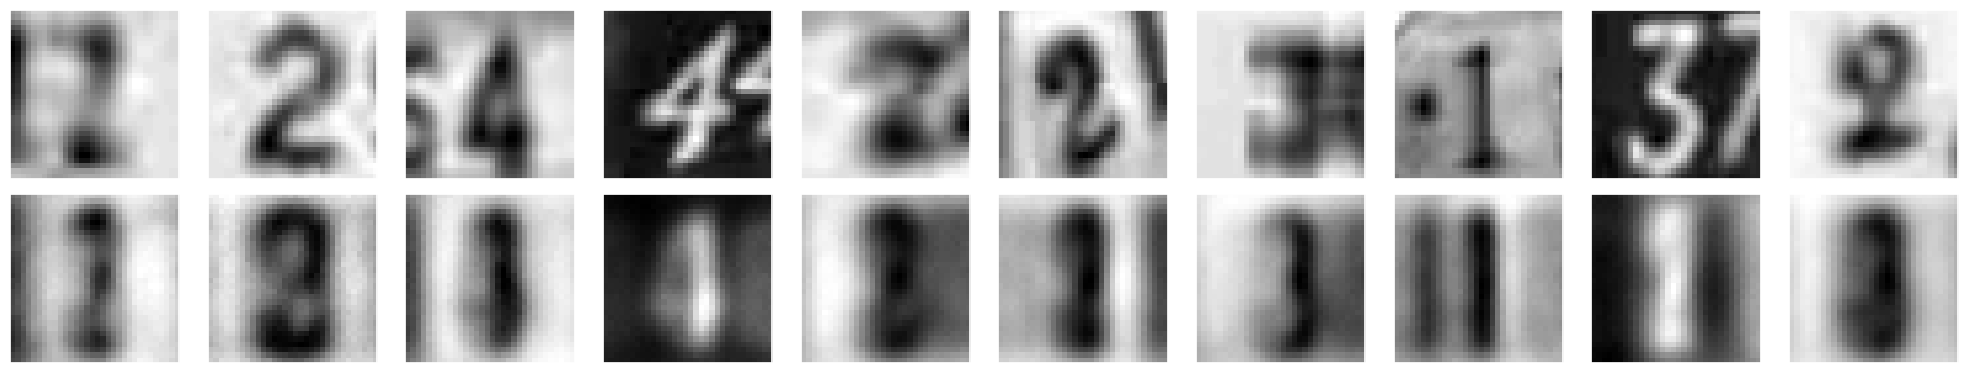

In [173]:
image_show(X_test_MLP, decoded_imgs)

## К сожалению, тут тоже не похоже на хорошую декодировку. Однако, двузначные числа она определяет явно лучше.

***
# 4. Оцените качество модели автокодировщика на тестовой выборке по показателю, указанному в индивидуальном задании.

Показатель качества -- MSLE


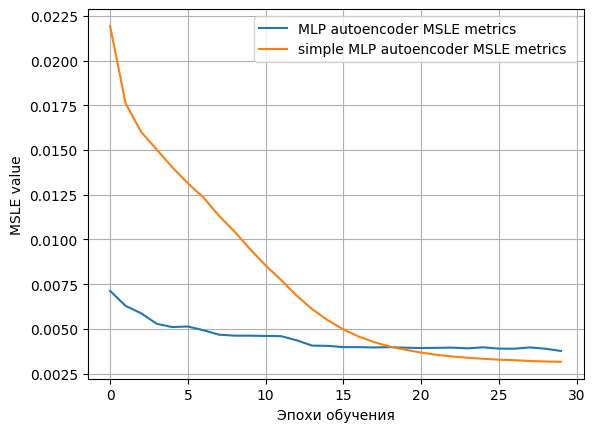

In [47]:
plt.plot(autoencoder16_hist.history['val_mean_squared_logarithmic_error'], label='MLP autoencoder MSLE metrics')
plt.plot(autoencoder16_simple_hist.history['val_mean_squared_logarithmic_error'], label='simple MLP autoencoder MSLE metrics ')
# plt.ylim([0, max(history.history['loss'])*0.5])
plt.xlabel('Эпохи обучения')
plt.ylabel('MSLE value')
plt.legend()
plt.grid(True)

## Однозначно, обе модели обучились примерно одинаково. По наблюдениям, лучше справилась простая MLP-модель. Будем наблюдать далее.

***
# 5. Оставьте в наборах изображения первых двух классов диапазона, указанного в индивидуальном задании первыми. Визуализируйте набор данных на плоскости, соответствующей двум первым латентным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

2. Диапазон классов: 0, 1, 2, 3, 4

In [48]:
df_train['label'].value_counts()

label
1    13861
2    10585
3     8497
4     7458
0     4948
Name: count, dtype: int64

In [49]:
X_train = unstack((df_train[df_train['label'] < 2])['image'].values)

In [50]:
X_train = np.reshape(X_train, (X_train.shape[0], (X_train.shape[1]*X_train.shape[2])))

In [51]:
X_train.shape

(18809, 1024)

In [52]:
X_test = unstack((df_test[df_test['label'] < 2])['image'].values)

In [53]:
X_test = np.reshape(X_test, (X_test.shape[0], (X_test.shape[1]*X_test.shape[2])))

In [54]:
X_test.shape

(6843, 1024)

In [55]:
n_samples, n_features = X_train.shape

Kmax = min(n_samples, n_features)

pca = PCA(n_components = Kmax)
X_transformed = pca.fit_transform(X_train)

evals = pca.explained_variance_

ll = log_likelyhood(evals)

fraction_var = np.cumsum(evals[:50]/np.sum(evals))

In [56]:
ll.shape

(1024,)

In [57]:
fraction_var

array([0.59093572, 0.66025521, 0.72066377, 0.75865057, 0.78235859,
       0.80200925, 0.82066198, 0.8358721 , 0.84933979, 0.85988334,
       0.868657  , 0.87530839, 0.88107701, 0.88638968, 0.89118928,
       0.8956638 , 0.89978352, 0.90371993, 0.90719715, 0.91043884,
       0.9135173 , 0.91639875, 0.91924307, 0.92204991, 0.92468351,
       0.92711381, 0.92942799, 0.9316658 , 0.93381269, 0.9359502 ,
       0.93803835, 0.93998474, 0.94184121, 0.94359987, 0.94528572,
       0.94691186, 0.94844187, 0.94992529, 0.95137922, 0.95275596,
       0.95407969, 0.95536552, 0.95659754, 0.9577969 , 0.95892962,
       0.96002821, 0.96110001, 0.96214817, 0.96315171, 0.96414199])

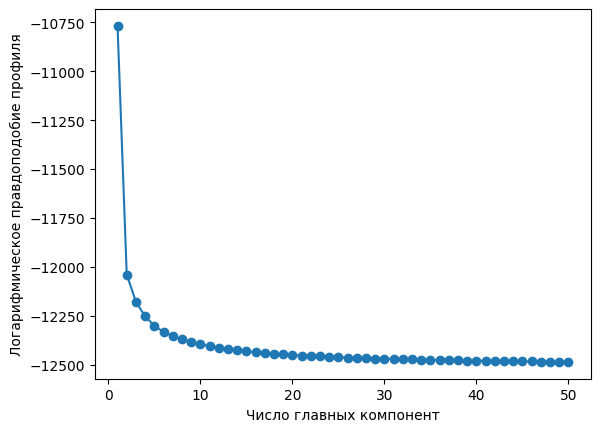

In [58]:
fig, ax = plt.subplots()
xs = np.arange(1, 51)
ys = ll[:50]

plt.xlabel("Число главных компонент")
plt.ylabel("Логарифмическое правдоподобие профиля")

ax.plot(xs, ys, marker = 'o')
plt.show()

In [59]:
ll[:50]

array([-10768.08991578, -12039.50334162, -12179.06662938, -12253.05844643,
       -12301.30713101, -12332.93758767, -12354.63268904, -12371.50720108,
       -12384.76427033, -12395.96117638, -12405.39765969, -12413.64191991,
       -12420.70728414, -12426.77563336, -12432.07232496, -12436.71759353,
       -12440.83912381, -12444.50187769, -12447.82495746, -12450.82979094,
       -12453.55436921, -12456.04337979, -12458.30900981, -12460.38055826,
       -12462.29807447, -12464.08350443, -12465.74289386, -12467.28624414,
       -12468.72750347, -12470.06947058, -12471.32582795, -12472.51321672,
       -12473.63364058, -12474.69390032, -12475.69729028, -12476.64767242,
       -12477.55232387, -12478.41123502, -12479.22677812, -12480.00573687,
       -12480.74918174, -12481.45869466, -12482.13777761, -12482.78718788,
       -12483.41113068, -12484.00928679, -12484.58289927, -12485.13335524,
       -12485.66334138, -12486.17231608])

In [60]:
X_transformed.shape

(18809, 1024)

In [61]:
evals

array([1.54367864e+06, 1.81080615e+05, 1.57802969e+05, ...,
       1.51190958e-01, 1.48884625e-01, 1.40332863e-01])

## Желтый -- первый класс. Синий -- второй

Text(0, 0.5, 'pc2')

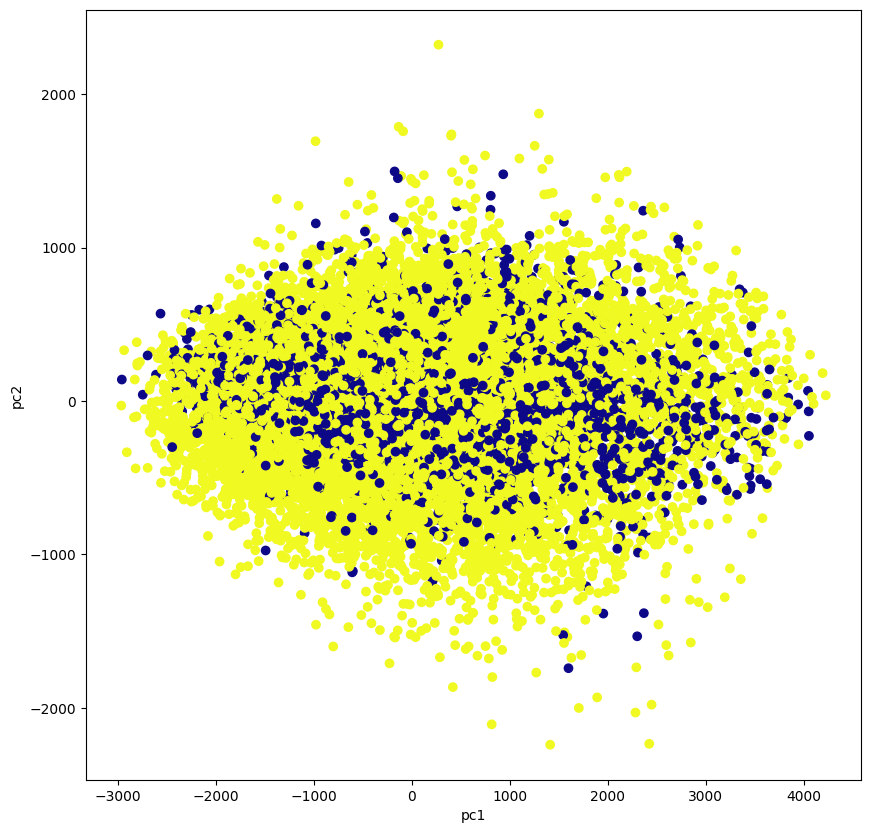

In [62]:
plt.figure(figsize = (10, 10))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c = (df_train[df_train['label'] < 2])['label'].values, cmap = 'plasma') # c = df_train['label'].values,
plt.xlabel('pc1')
plt.ylabel('pc2')

## Как мы видим, видной корреляции нет, что было еще понятно на момент визуализации логарифмического правдоподобия.

***
# 6. Выполните бинарную классификацию изображений по латентным (скрытым) признакам и всем признакам при помощи классификатора метода ближайших соседей (kNN). Оцените бинарный классификатор, указанный в индивидуальном задании, для двух построенных классификаторов.

5. Показатель качества бинарной классификации:

F1-мера, равная 2*TP/(2*TP+FP+FN)

In [63]:
y_train = (df_train[df_train['label'] < 2])['label'].values

In [64]:
y_train.shape

(18809,)

In [65]:
y_test = (df_test[df_test['label'] < 2])['label'].values
y_test.shape

(6843,)

In [66]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [67]:
encoded_train_imgs = encoder16.predict(X_train)

588/588 [==============================] - 2s 3ms/step


In [68]:
encoded_train_imgs.shape

(18809, 16)

In [69]:
def plot_confusion_matrix(data, labels, fname):
  sns.set(color_codes=True)
  plt.figure(1, figsize=(9,6))

  sns.set(font_scale = 1.3)
  ax = sns.heatmap(data, annot = True, cmap = 'Blues',
                   cbar_kws = {'label': 'Шкала'}, fmt = 'd')

  ax.set_xticklabels(labels, fontsize = 16)
  ax.set_yticklabels(labels, fontsize = 16)

  ax.set_xlabel("Прогнозируемые метки", fontsize = 16)
  ax.set_ylabel("Истинные метки", fontsize = 16)

  plt.show()
  plt.close()

## По латентным признакам:

In [70]:
encoded_test_imgs = encoder16.predict(X_test)

214/214 [==============================] - 1s 3ms/step


In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7).fit(encoded_train_imgs, y_train)

accuracy = knn.score(encoded_test_imgs, y_test)
print(accuracy)

0.869209411077013


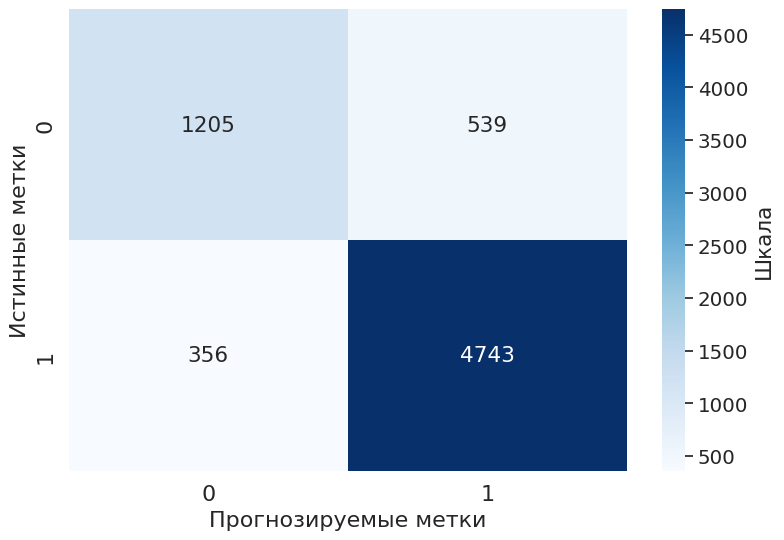

In [72]:
knn_predictions = knn.predict(encoded_test_imgs)

cm = confusion_matrix(y_test, knn_predictions)

plot_confusion_matrix(cm, [0, 1], "idk")

## Со всеми метками:

In [73]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print(accuracy)

0.9180184129767646


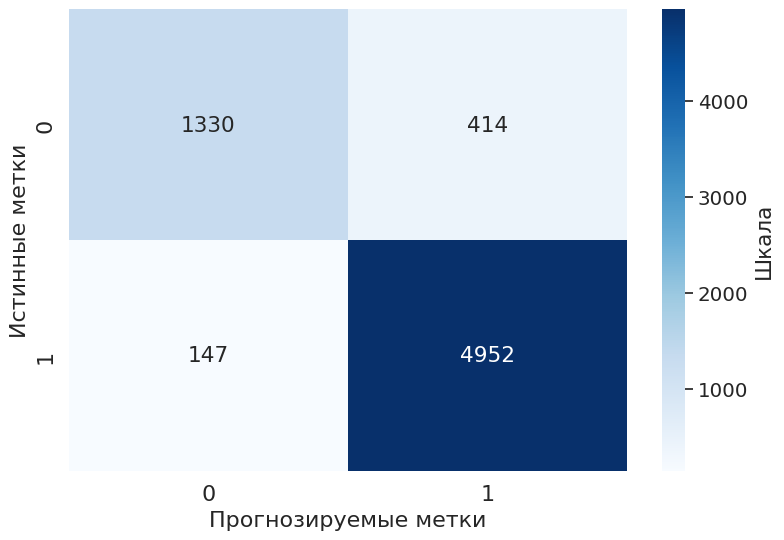

In [74]:
knn_predictions = knn.predict(X_test)

cm = confusion_matrix(y_test, knn_predictions)

plot_confusion_matrix(cm, [0, 1], "idk")

***
# 7. Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) (Указание: используйте метод predict_proba() класса KNeighborsClassifier).

In [76]:
def TN(y_true, y_predict):
  assert len(y_true) == len(y_predict)
  return np.sum((y_true == 0) & (y_predict == 0))

In [77]:
def FP(y_true, y_predict):
  assert len(y_true) == len(y_predict)
  return np.sum((y_true == 0) & (y_predict == 1))

In [78]:
def FN(y_true, y_predict):
  assert len(y_true) == len(y_predict)
  return np.sum((y_true == 1 ) & (y_predict == 0))

In [79]:
def TP(y_true, y_predict):
  assert len(y_true) == len(y_predict)
  return np.sum((y_true == 1) & (y_predict == 1))

In [80]:
def tpr_score(y_true, y_predict):
  tp = TP(y_true, y_predict)
  fn = FN(y_true, y_predict)
  try:
    return tp / (tp+fn)
  except:
    return 0.0

In [81]:
def fpr_score(y_true, y_predict):
  fp = FP(y_true, y_predict)
  tn = TN(y_true, y_predict)
  try:
    return fp/(fp+tn)
  except:
    return 0.0

In [82]:
def true_false_positive(threshold_vector, y_test):
  true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
  true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
  false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
  false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

  tpr = true_positive.sum()/( true_positive.sum() + false_negative.sum())
  fpr = false_positive.sum()/(false_positive.sum() + true_negative.sum())

  return tpr, fpr

In [83]:
def roc_from_scratch(probabilities, y_test, partitions = 100):
  roc = np.array([])

  for i in range(partitions + 1):
    threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
    tpr, fpr = true_false_positive(threshold_vector, y_test)
    roc = np.append(roc, [fpr, tpr])

  return roc.reshape(-1, 2)

In [88]:
prediction = knn.predict_proba(X_test)
prediction.shape

(6843, 2)

In [90]:
prediction[0]

array([0.14285714, 0.85714286])

In [100]:
y_test.shape

(6843,)

In [101]:
y_test[0]

1

In [106]:
def to_one_hot_binary(arr: np.ndarray):
  res = np.array([])
  for i in range(arr.shape[0]):
    if arr[i] == 1:
      res = np.append(res, [0, 1])
    else:
      res = np.append(res, [1, 0])

  return res.reshape(-1, 2)

In [107]:
y_roc = to_one_hot_binary(y_test)

In [108]:
y_roc.shape

(6843, 2)

In [109]:
y_roc[0]

array([0., 1.])

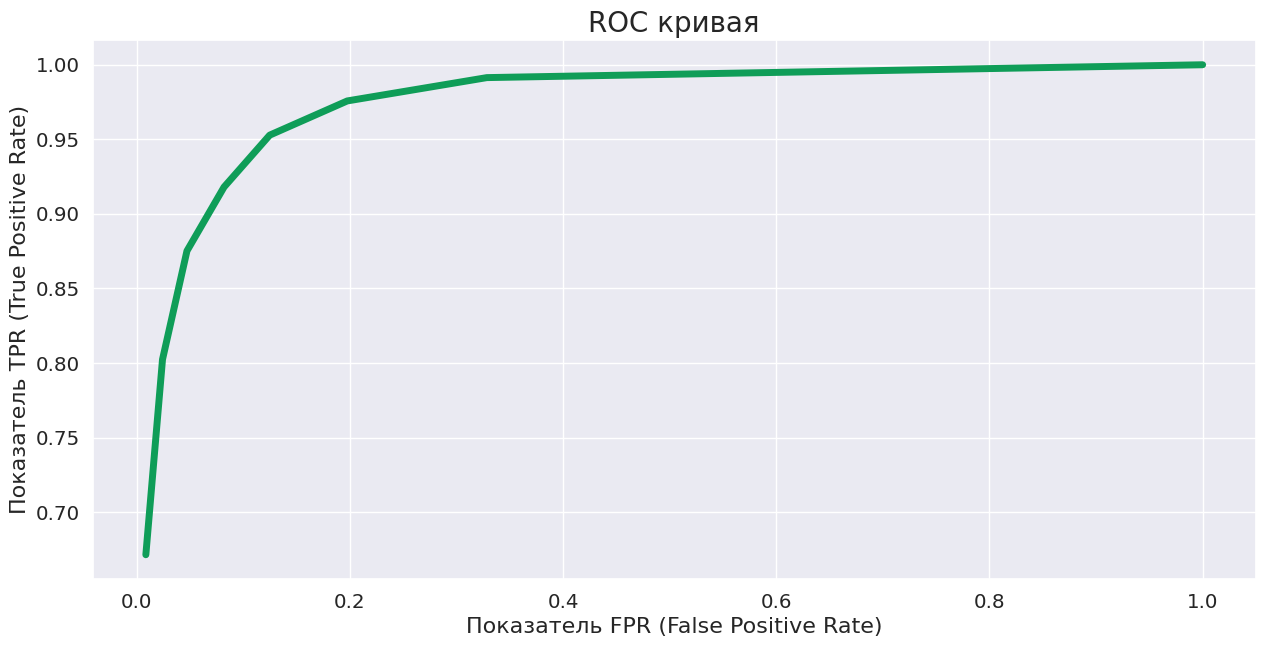

In [111]:
plt.figure(figsize=(15,7))

ROC = roc_from_scratch(prediction.reshape(-1),y_roc.reshape(-1),partitions=500)
#plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58',lw=5)
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);

***
# 8.Визуализируйте границы принятия решений классификатора kNN для латентных признаков на плоскости, соответствующей двум первым латентным признакам (для прочих латентных признаков задайте средние/медианные значения).

In [113]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X_test[0, :].min() - 0.1, X_test[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()]
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [167]:
encoded_test_imgs = encoder16.predict(X_test)

214/214 [==============================] - 1s 6ms/step


In [163]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(encoded_train_imgs, y_train)

In [168]:
knn_predictions = knn.predict(encoded_test_imgs)

(-2240.4444317431944, 2321.9377032541493)

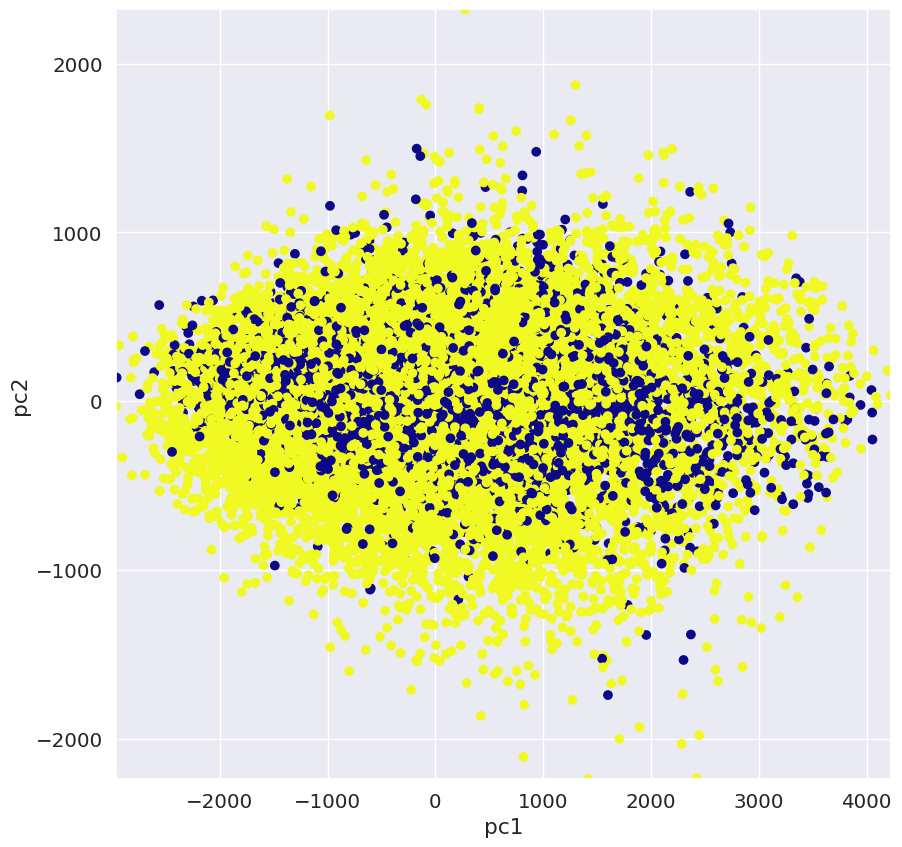

In [144]:
# plt.countourf(xx, yy, y_pred, cmap = plt.cm.RdYlBl, alpha = 0.7)
plt.figure(figsize = (10, 10))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c = y_train, cmap = 'plasma') # c = df_train['label'].values,
plt.xlabel('pc1')
plt.ylabel('pc2')

***
# 9. Определите на первоначальной тестовой выборке изображение, имеющее наибольшую ошибку реконструкции. Выведите для этого изображения первоначальное и реконструированное изображения.

In [175]:
RE = ((X_test_MLP - decoded_imgs)**2).mean(axis = 1)
RE_orig = RE.copy()

In [176]:
RE.shape

(16397,)

In [177]:
RE.sort()
print(RE[16387:])

[0.06340223 0.0664329  0.06709305 0.06770665 0.07038349 0.07225961
 0.0727417  0.0731889  0.07516913 0.08634971]


In [178]:
biggest_re_ind = np.argmax(RE_orig)

In [182]:
X_test_MLP.shape

(16397, 1024)

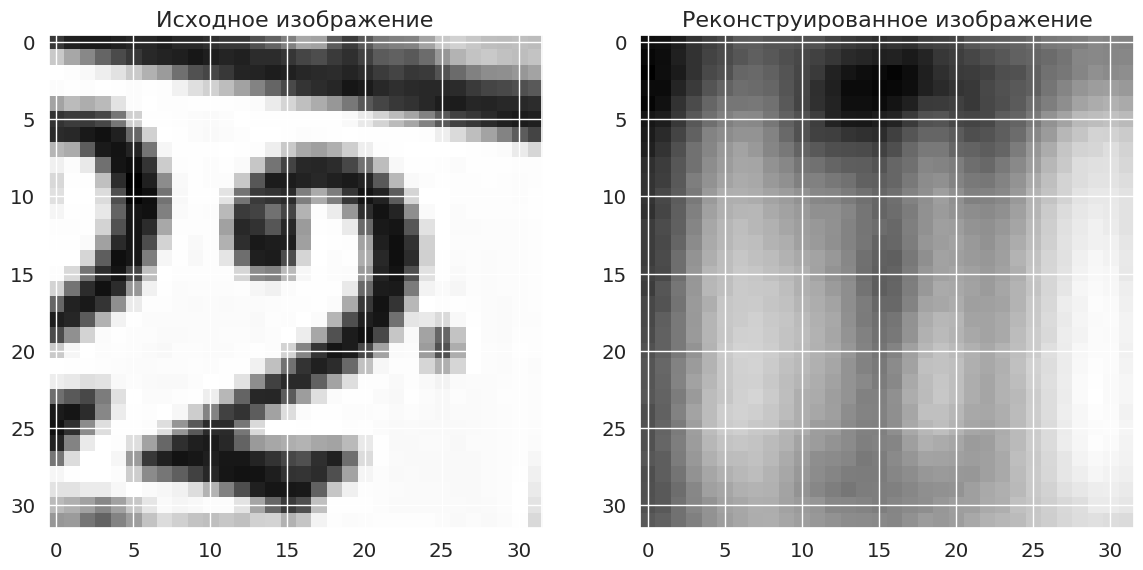

In [184]:
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(1, 2, 1)
plt.title('Исходное изображение', fontsize = 16)
plt.imshow(X_test_MLP[biggest_re_ind].reshape(32, 32))

ax = fig.add_subplot(1, 2, 2)
plt.title('Реконструированное изображение', fontsize = 16)
plt.imshow(decoded_imgs[biggest_re_ind].reshape(32, 32));